In [1]:
# basic libraries
import numpy as np 
import pandas as pd 
# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv


In [2]:
df = pd.read_csv("/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Info about the data and statistical discription:**

In [3]:
#showing no. of columns and rows
df.shape

(9994, 13)

In [4]:
#showing all the fields
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
#showing info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#showing statistical summary
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#showing no.of unique values present in data
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**DATA CLEANING**

In [8]:
#checking null values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# Checking the dupilication in data
df.duplicated().sum()

17

In [10]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

In [11]:
#Deleting the categorical Variable for correlation
col=['Postal Code','Segment','Country','City','State','Ship Mode','Category','Region','Sub-Category']
df1=df.drop(columns=col,axis=1)
df1.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [12]:
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [13]:
df1.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


**EDA (EXPLORATORY DATA ANALYSIS)**

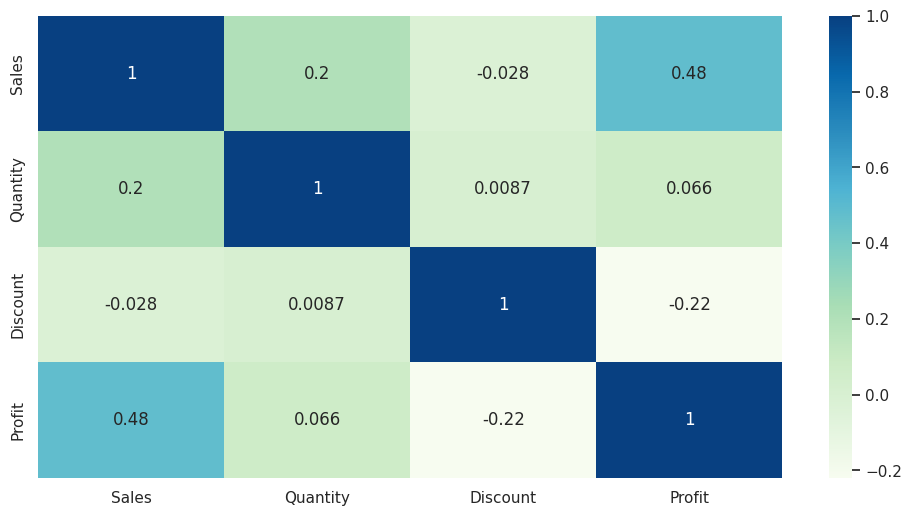

In [14]:
#relation between sales,profit,quantity and discount
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = df1.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

**The above heatmap shows that Profits, Sales and Quantity these features/columns have strong bond, which means any slight change in any of these will impact the business.**

In [15]:
#creating a field for profitmagin
df['Profit %'] = (df.Profit / df.Sales) * 100
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [16]:
#descriptive summary
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ship Mode,9977,4,Standard Class,5955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9977,3,Consumer,5183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9977,1,United States,9977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9977,531,New York City,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9977,49,California,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9977.0,NaN,NaN,NaN,55154.964117,32058.266816,1040.0,23223.0,55901.0,90008.0,99301.0
Region,9977,4,West,3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9977,3,Office Supplies,6012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,9977,17,Binders,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9977.0,NaN,NaN,NaN,230.148902,623.721409,0.444,17.3,54.816,209.97,22638.48


**'NaN' is showing for categorical columns because they are not meant to have calculations performed on them.**

**Q. Which is the Top Selling Sub-Category**

In [17]:
df2 = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))

df2

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


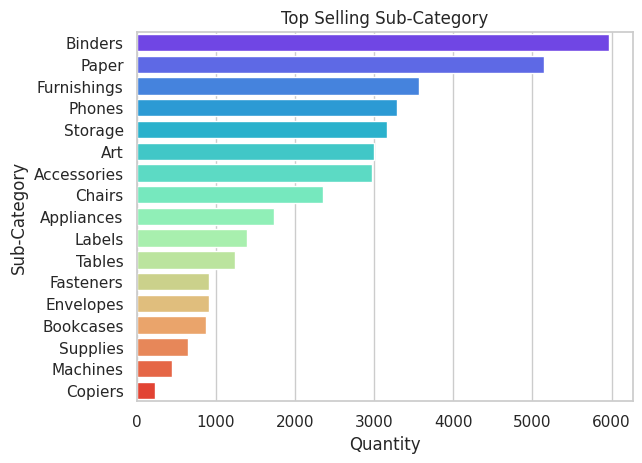

In [18]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df2, y = df2.index, x = df2.Quantity, palette = "rainbow")
plt.title("Top Selling Sub-Category")
plt.show()

**Thus, BINDERS and PAPER are the most seling Sub-Category**

**Q. Which is the most Profitable Customer Segment?**

In [19]:
df3 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
df3

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


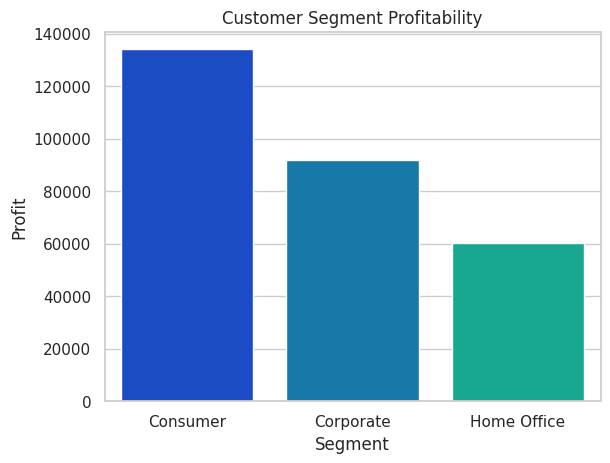

In [20]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df3, x = df3.index, y = df3.Profit, palette = "winter")
plt.title("Customer Segment Profitability")
plt.show()

**The most profitable segment is Customer Segment.**

**Q. Which Ship Mode is Most Preferred?**

In [21]:
ship_mode_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Quantity']].sum())

In [22]:
ship_mode_df

,Quantity
Ship Mode,
First Class,5690
Same Day,1956
Second Class,7418
Standard Class,22756


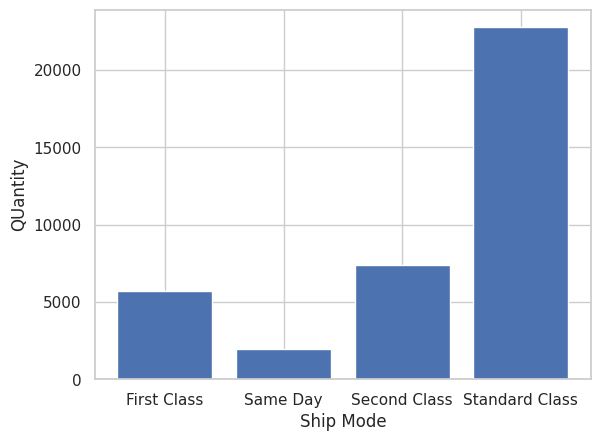

In [23]:
plt.bar(ship_mode_df.index, ship_mode_df['Quantity'])
plt.xticks(ship_mode_df.index)
plt.xlabel("Ship Mode")
plt.ylabel("QUantity")
plt.show()

**Q. Which Region is the Most Profitable?**

In [24]:
region_df = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_df

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


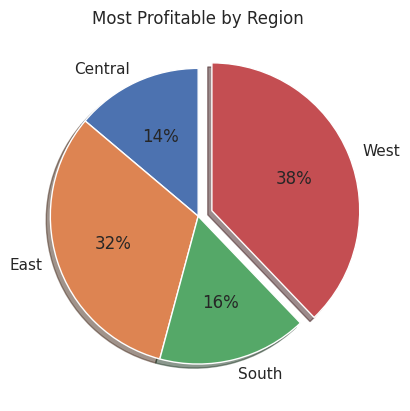

In [25]:
explode = [0, 0, 0, 0.1]
plt.pie(region_df.Profit, labels = region_df.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)

plt.title("Most Profitable by Region")

plt.show()

**The most Profitable Region are East and West**

**Q. Which city has the highest Sales?**

In [26]:
city_sales = pd.DataFrame(df.groupby('City')['Sales'].sum())
city_sales =city_sales.sort_values( by="Sales",ascending=False)
city_sales.head()

,Sales
City,
New York City,256319.041
Los Angeles,175831.901
Seattle,119460.282
San Francisco,112577.172
Philadelphia,109061.461


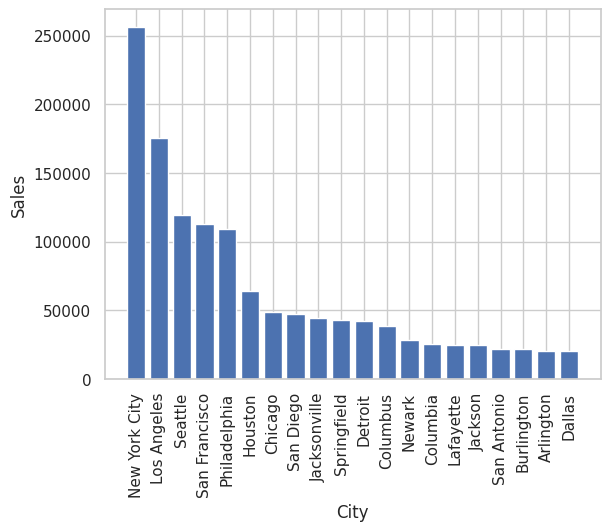

In [27]:
plt.bar(city_sales.index[0:20], city_sales['Sales'][0:20])
plt.xticks(city_sales.index[0:20],rotation = 'vertical')
plt.xlabel("City" )
plt.ylabel("Sales")
plt.show()

**The City having highest sales are New York , Los Angeles.**